# Isodensity lines in R and $\rho$

Plot isodensity lines. Optionally, you can tune a median filter to remove fast fluctuations in density.

This notebook runs in autopilot, meaning you can control everything by changing a few parameters. Look for the indication **<span style="color:blue">parameters</span>** to find them. Every cell contains a brief description at the top.

Refer to notebook 15A for ELM-free isodensity lines.

#### Import libraries

In [1]:
%matplotlib notebook
from IPython.core.display import display, HTML
from ipfnpytools.getsig import getsig
import ipfnpytools.aug_read as aug_read
from ipfnpytools.closest import closest
import matplotlib.pyplot as plt
from __future__ import print_function
from ipfnpytools.plot import plots
from warnings import warn
import numpy as np
from ipfnpytools.save_figure import save_figure
from ipfnpytools import rps_dump
import reflectometry as rfl
from scipy.signal import medfilt
from ipfnpytools.trz_to_rhop import trz_to_rhop
from ipfnpytools.trhoptheta_to_rz import trhoptheta_to_rz
import matplotlib.patheffects as pe

### <span style="color:blue">Parameters</span>

In [2]:
# Shot number
shot = 37750

# Choose profile source between 'afs' and 'dump'
source = 'afs'

# If chosen 'dump', state the relative path
path = None

# Magnetic equillibrium
equillibrium = "EQH"

# Adjust Isodensity parameters
n_iso = 10           # Number of lines
start_density = 3e18 # First isodensity
stop_density = 3e19  # Last isodensity

# Median filter number of points (n=1 is equivalente to the unfiltered signal)
median_points = 11

### Fetch density data and apply median filter

In [3]:
# Fetching data ---------------------------------------------------

time, lfs_signal, hfs_signal, lfs_area, hfs_area = rfl.fetch(shot, path if source=='dump' else None, verbose=True)

# Apply median filter to the radius
lfs_area = medfilt(lfs_area, (median_points, 1))
hfs_area = medfilt(hfs_area, (median_points, 1))

density = lfs_signal[0,:]

last_index = closest(density, stop_density)
first_index = closest(density, start_density)

if (last_index - first_index + 1) < n_iso:
    warn("Impossible drawing " + str(n_iso) + " isodensities, drawing only " + str(last_index - first_index + 1))
    n_iso = last_index - first_index + 1


/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(err_txt, RuntimeWarning)


('time:', (37323,))
('lfs_signal:', (37323, 151))
('lfs_area:', (37323, 151))
('hfs_signal:', (37323, 151))
('hfs_area:', (37323, 151))


### <span style="color:blue">Parameters</span>

Uncomment one of the following two lines of code according to your preference

In [4]:
# ------------------------ CHOOSE ONE -------------------------------    
    
# Guarantees uniform spacing but not inclusion of last isodensity
# drawing_indexes = np.unique(range(first_index, last_index + 1, (last_index - first_index + 1)/n_iso))

# Guarantees inclusion of last isodensity but not uniform spacing
drawing_indexes = np.unique(np.rint(np.linspace(first_index, last_index, n_iso)).astype(np.int))

print("Selected isodensities:", [density[i] for i in drawing_indexes])

Selected isodensities: [2.980164e+18, 4.477999e+18, 6.5619426e+18, 8.7110095e+18, 1.153922e+19, 1.4339518e+19, 1.7911995e+19, 2.1363529e+19, 2.5680266e+19, 2.9783034e+19]


### Plot isodensities in R \[m\] vs. time \[s\]

In [5]:
fig, axes = plots(
    x=time, y=[lfs_area.T[i] for i in drawing_indexes] + [hfs_area.T[i] for i in drawing_indexes], 
    boxes=[0]*n_iso + [1]*n_iso, 
    labels=["%.2e" % density[i] for i in drawing_indexes] + [None]*len(drawing_indexes),
    legend_kw={'loc':'center left', 'bbox_to_anchor':[1.02,-1,0.3,2]},
    y_mins=[None]*n_iso + [None]*n_iso,
    y_maxs=[None]*n_iso + [None]*n_iso,
    sharex=True,
    y_labels=["LFS\nR [m]", "HFS\nR [m]"],
    x_labels=["", "Time [s]"],
    title=str(shot)
)

<IPython.core.display.Javascript object>

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/2/2019.03/lib/python2.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


### <span style="color:blue">Parameters</span>
Change the figure manualy with your cursor, or by running the following cell

In [6]:
fig.set_size_inches(9, 4)  # Figure size in inches (width, height)
axes[0].set_ylim(2.1, 2.25)  # LFS range in R [m]
axes[1].set_ylim(1.05, 1.10) # HFS range in R [m]

axes[0].set_xlim(2.0, 6.3); # Time range [s]

### Save the figure to your working directory

In [7]:
save_figure(fig, "%d_isodensity" % (shot))

Figure saved to /afs/ipp-garching.mpg.de/home/d/danielhfc/python/AUG/37750_isodensity.png


### Adding separatrix information

Add primary and secondary separatrix to the isodensity plot

In [8]:
# Set the antenna Z
zl = 0.14
zh = 0.07

# Get lower x point
rxpu = getsig(shot, 'GQH', 'Rxpu')
zxpu = getsig(shot, 'GQH', 'Zxpu')

# Get upper x point
rxpo = getsig(shot, 'GQH', 'Rxpo')
zxpo = getsig(shot, 'GQH', 'Zxpo')

# rho_x_u = trz_to_rhop(rxpu.time, rxpu.data, zxpu.data, 
#                       shot=shot, eq=equillibrium)
# rho_x_u = np.diag(rho_x_u)

rho_x_o = trz_to_rhop(rxpo.time, rxpo.data, zxpo.data, 
                      shot=shot, eq=equillibrium)
rho_x_o = np.diag(rho_x_o)

# print(rho_x_u)
print(rho_x_o)

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(err_txt, RuntimeWarning)


trz_to_rhop:6227/6227
[1.1138648 1.1158373 1.8302788 ... 1.0669417 1.0651938 1.0885985]


In [9]:
# Discover R of secondary separatrix

r_second_hfs = []
for t, rho in zip(rxpo.time, rho_x_o):
    r_second_hfs.append(trhoptheta_to_rz(t, rho, np.pi, shot=shot, eq=equillibrium, verbose=False)[0])
r_second_hfs = np.array(r_second_hfs)
    
r_second_lfs = []
for t, rho in zip(rxpo.time, rho_x_o):
    r_second_lfs.append(trhoptheta_to_rz(t, rho, 0, shot=shot, eq=equillibrium, verbose=False)[0])  
r_second_lfs = np.array(r_second_lfs)

# Separatrix positions
rin = getsig(shot, 'GQH', 'Rin')
raus = getsig(shot, 'GQH', 'Raus')

**The next cell draws the separatrix and secondary separatrix on the previous plot**

To refresh the plot and erase the separatrix information simply re-run the plotting cell 

In [10]:
axes[0].plot(raus.time, medfilt(raus.data, median_points), color='black', linestyle='--', label='sep.', alpha=0.6, path_effects=[pe.Stroke(linewidth=5, alpha=0.6, foreground='w'), pe.Normal()])
axes[1].plot(rin.time, medfilt(rin.data, median_points), color='black', linestyle='--', label='sep.', alpha=0.6, path_effects=[pe.Stroke(linewidth=5, alpha=0.6, foreground='w'), pe.Normal()])

axes[0].plot(rxpo.time, medfilt(r_second_lfs, median_points), color='red', linestyle='--', label='2$^{nd}$ sep.', alpha=0.6, path_effects=[pe.Stroke(linewidth=5, alpha=0.6, foreground='w'), pe.Normal()])
axes[1].plot(rxpo.time, medfilt(r_second_hfs, median_points), color='red', linestyle='--', label='2$^{nd}$ sep.', alpha=0.6, path_effects=[pe.Stroke(linewidth=5, alpha=0.6, foreground='w'), pe.Normal()])

axes[0].legend(loc='center left', bbox_to_anchor=[1.02,-1,0.3,2]);

### Isodensities in $\rho$

In [12]:
# Walls
inner_wall = 1.045
outer_wall = 2.22

inner_wall_rho = trz_to_rhop(time, inner_wall, zh, shot, eq=equillibrium)
outer_wall_rho = trz_to_rhop(time, outer_wall, zl, shot, eq=equillibrium)
rhol = trz_to_rhop(time, lfs_area, np.ones_like(lfs_area)*zl, shot, eq=equillibrium)
rhoh = trz_to_rhop(time, hfs_area, np.ones_like(hfs_area)*zh, shot, eq=equillibrium)

trz_to_rhop:37323/37323
trz_to_rhop:37323/37323
trz_to_rhop:37323/37323
trz_to_rhop:37323/37323


<IPython.core.display.Javascript object>


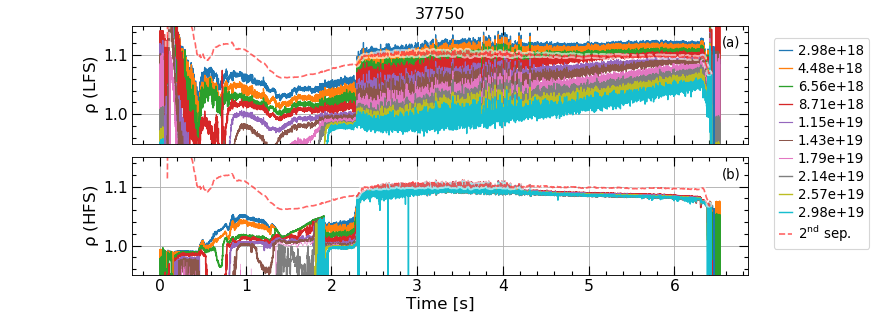

(0.95, 1.15)

In [13]:
fig2, axes2 = plots(x=time, y=[rhol.T[i] for i in drawing_indexes] + [rhoh.T[i] for i in drawing_indexes], 
                  boxes=[0]*n_iso + [1]*n_iso, 
                  labels=["%.2e" % density[i] for i in drawing_indexes] + [None]*len(drawing_indexes),
                  legend_kw={'loc':'center left', 'bbox_to_anchor':[1.02,-1,0.3,2]},
                  y_mins=[None]*n_iso + [None]*n_iso,
                  y_maxs=[None]*n_iso + [None]*n_iso,
                  sharex=True,
                  sharey=True,
                  y_labels=[r"$\rho$ (LFS)", r"$\rho$ (HFS)"],
                  title=str(shot))
fig2.set_size_inches(11, 4)
# plt.tight_layout()
# plt.xlim((2, 8))
plt.xlabel("Time [s]")

# axes[0].plot(raus.time, raus.data, color='black', linestyle='--', label='sep.', alpha=0.6, path_effects=[pe.Stroke(linewidth=5, alpha=0.6, foreground='w'), pe.Normal()])
# axes[1].plot(rin.time, rin.data, color='black', linestyle='--', label='sep.', alpha=0.6, path_effects=[pe.Stroke(linewidth=5, alpha=0.6, foreground='w'), pe.Normal()])

axes2[0].plot(rxpo.time, medfilt(rho_x_o, median_points), color='red', linestyle='--', label='2$^{nd}$ sep.', alpha=0.6, path_effects=[pe.Stroke(linewidth=5, alpha=0.6, foreground='w'), pe.Normal()])
axes2[1].plot(rxpo.time, medfilt(rho_x_o, median_points), color='red', linestyle='--', label='2$^{nd}$ sep.', alpha=0.6, path_effects=[pe.Stroke(linewidth=5, alpha=0.6, foreground='w'), pe.Normal()])

axes2[0].legend(loc='center left', bbox_to_anchor=[1.02,-1,0.3,2]);

plt.ylim(0.95, 1.15)

**Change the window manually, or by running the cell bellow**

In [ ]:
axes2[1].set_ylim(0.8, 1.2) # rho poloidal
axes2[1].set_xlim(0, 8)     # Time[s]